## کدو کی قیمت کے لیے لکیری اور کثیرالحدی رجعت - سبق 3

ضروری لائبریریاں اور ڈیٹاسیٹ لوڈ کریں۔ ڈیٹا کو ایک ڈیٹا فریم میں تبدیل کریں جو ڈیٹا کا ایک حصہ شامل کرے:

- صرف وہ کدو حاصل کریں جو بوشل کے حساب سے قیمت دیے گئے ہوں
- تاریخ کو مہینے میں تبدیل کریں
- قیمت کو اونچی اور نیچی قیمتوں کے اوسط کے طور پر حساب کریں
- قیمت کو بوشل کی مقدار کے حساب سے ظاہر کریں


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

ایک اسکیٹرپلاٹ ہمیں یاد دلاتا ہے کہ ہمارے پاس صرف اگست سے دسمبر تک کے مہینوں کا ڈیٹا ہے۔ ہمیں شاید مزید ڈیٹا کی ضرورت ہے تاکہ ہم لکیری انداز میں نتائج اخذ کر سکیں۔


<AxesSubplot:xlabel='Month', ylabel='Price'>

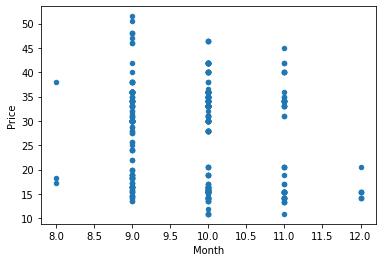

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

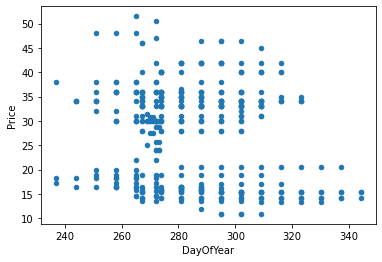

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

آئیے دیکھتے ہیں کہ کیا کوئی تعلق ہے:


In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


ایسا لگتا ہے کہ تعلق کافی کمزور ہے، لیکن کوئی اور زیادہ اہم تعلق موجود ہے - کیونکہ اوپر دیے گئے پلاٹ میں قیمت کے پوائنٹس کئی مختلف کلسٹرز میں نظر آتے ہیں۔ آئیے ایک پلاٹ بناتے ہیں جو مختلف کدو کی اقسام کو دکھائے:


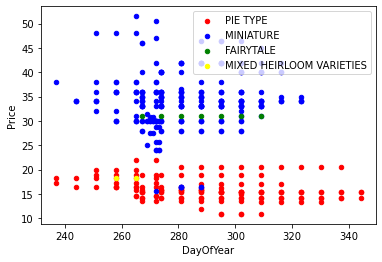

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

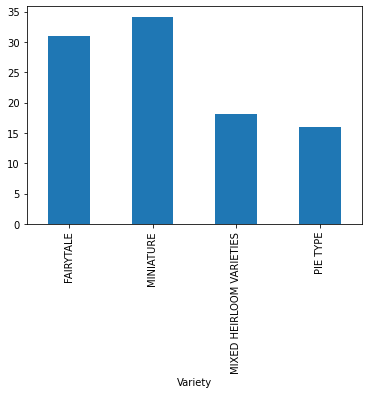

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

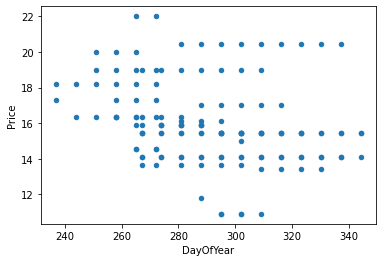

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### لکیری رجعت

ہم لکیری رجعت ماڈل کو تربیت دینے کے لیے Scikit Learn کا استعمال کریں گے:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


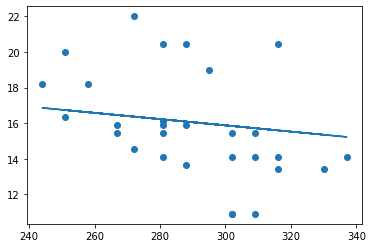

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

لکیری رجعتی گتانکات سے لکیر کی ڈھلوان کا تعین کیا جا سکتا ہے:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

ہم تربیت یافتہ ماڈل کو قیمت کی پیش گوئی کے لیے استعمال کر سکتے ہیں:


In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### کثیر رکنی ریگریشن

کبھی کبھار خصوصیات اور نتائج کے درمیان تعلق فطری طور پر غیر خطی ہوتا ہے۔ مثال کے طور پر، کدو کی قیمتیں سردیوں میں زیادہ ہو سکتی ہیں (مہینے=1،2)، پھر گرمیوں میں کم ہو سکتی ہیں (مہینے=5-7)، اور پھر دوبارہ بڑھ سکتی ہیں۔ خطی ریگریشن اس تعلق کو درست طریقے سے تلاش کرنے سے قاصر ہے۔

ایسے میں، ہم اضافی خصوصیات شامل کرنے پر غور کر سکتے ہیں۔ ایک آسان طریقہ یہ ہے کہ ان پٹ خصوصیات سے کثیر رکنی (polynomials) استعمال کریں، جس کے نتیجے میں **کثیر رکنی ریگریشن** حاصل ہو گی۔ Scikit Learn میں، ہم پائپ لائنز کا استعمال کرتے ہوئے خودکار طور پر کثیر رکنی خصوصیات پہلے سے تیار کر سکتے ہیں:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


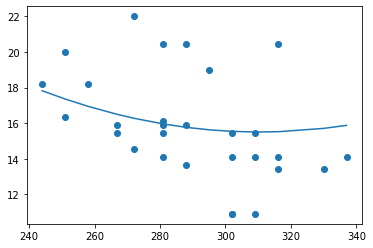

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### اقسام کو انکوڈ کرنا

ایک مثالی دنیا میں، ہم چاہتے ہیں کہ مختلف کدو کی اقسام کے لیے قیمتوں کی پیش گوئی ایک ہی ماڈل کے ذریعے کی جا سکے۔ اقسام کو مدنظر رکھنے کے لیے، ہمیں پہلے اسے عددی شکل میں تبدیل کرنا ہوگا، یا **انکوڈ** کرنا ہوگا۔ اس کے کئی طریقے ہیں:

* سادہ عددی انکوڈنگ، جو مختلف اقسام کی ایک جدول بنائے گی، اور پھر قسم کے نام کو اس جدول میں ایک انڈیکس سے بدل دے گی۔ یہ طریقہ لکیری رجعت کے لیے بہترین نہیں ہے، کیونکہ لکیری رجعت انڈیکس کی عددی قدر کو مدنظر رکھتی ہے، اور عددی قدر ممکنہ طور پر قیمت کے ساتھ عددی طور پر مطابقت نہیں رکھتی۔
* ون-ہاٹ انکوڈنگ، جو `Variety` کالم کو 4 مختلف کالمز سے بدل دے گی، ہر قسم کے لیے ایک کالم، جو 1 دکھائے گا اگر متعلقہ قطار دی گئی قسم کی ہو، اور 0 اگر نہ ہو۔

نیچے دیا گیا کوڈ دکھاتا ہے کہ ہم کس طرح ایک قسم کو ون-ہاٹ انکوڈ کر سکتے ہیں:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### مختلف اقسام پر لکیری رجعت

اب ہم وہی کوڈ استعمال کریں گے جو اوپر دیا گیا ہے، لیکن `DayOfYear` کی بجائے ہم اپنی ون-ہاٹ-انکوڈڈ قسم کو بطور ان پٹ استعمال کریں گے:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


ہم اسی طریقے سے دیگر خصوصیات کو استعمال کرنے کی کوشش بھی کر سکتے ہیں، اور انہیں عددی خصوصیات جیسے کہ `Month` یا `DayOfYear` کے ساتھ ملا سکتے ہیں:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### کثیر رقمی رجعت

کثیر رقمی رجعت کو ان زمرہ جاتی خصوصیات کے ساتھ بھی استعمال کیا جا سکتا ہے جو ایک-ہاٹ-انکوڈڈ ہوں۔ کثیر رقمی رجعت کو تربیت دینے کے لیے کوڈ بنیادی طور پر وہی ہوگا جو ہم نے اوپر دیکھا ہے۔


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**ڈس کلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے پوری کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا عدم درستگی ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے لیے ہم ذمہ دار نہیں ہیں۔
